Grupo 14

In [5]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import diff,symbols,dsolve, expand_complex,Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, asin,pprint, init_printing, Derivative, sqrt, integrate, Eq, lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting
import sympy
# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

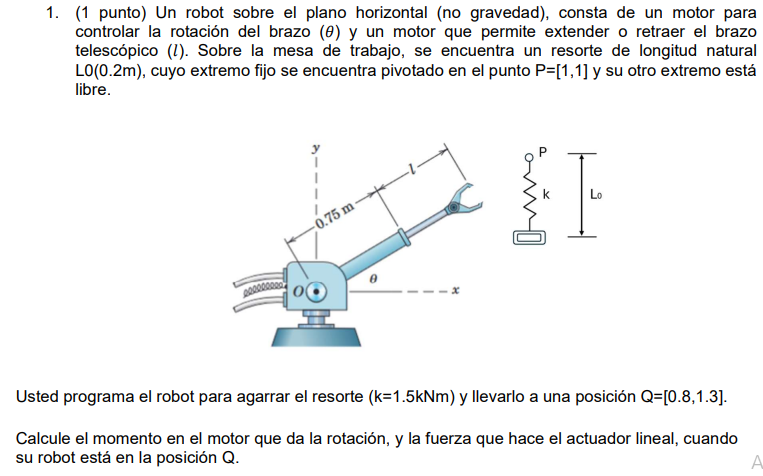

In [ ]:
N = ReferenceFrame("N")
theta, l = dynamicsymbols("theta, l") #Dependen del tiempo
A = N.orientnew("A", "Axis", (theta, N.z)) #Marco que sigue al brazo

#Simbolos de distancias/posiciones/generales
L0 = symbols("L0") #L0 tiene valor de 0.2, es la extensión natural del resorte
m1 , m2 = symbols("m1 m2")

#Vectores de la posición del resorte
P = 1*N.x + 1*N.y
Q = 0.8*N.x + 1.3*N.y

#Simbolos de fuerzas
R_0_1_x , R_0_1_y = symbols("R_0_1_x , R_0_1_y")
R_normal = symbols("R_normal")

#Simbolos de momentos
M_motor = symbols("M_motor")
M_prismatica = symbols("M_prismatica")

#Fuerzas
R_0_1 = R_0_1_x*N.x + R_0_1_y*N.y
R_N = R_normal*A.y #reacción normal de la prismática

#Momentos
M_m = M_motor*N.z
M_p = M_prismatica*N.z

#Inercias
I_1 = (m1/12)*0.75**2
I_2 = (m2/12)*l**2 + m2*()

#Cinemática cuerpo 1
X_1 = (0.75/2)*A.x
#Ecuaciones de Newton-Euler cuerpo 1
sumF_1 = R_0_1 + R_N -m_1*X_1.diff(t,t)
sumM_1 = M_m + M_p -I

#Cinemática cuerpo 2
X_2 = (0.75+l/2)*A.x

SyntaxError: invalid syntax (2429918333.py, line 28)

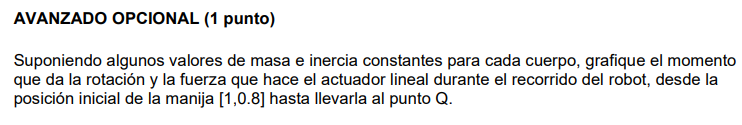

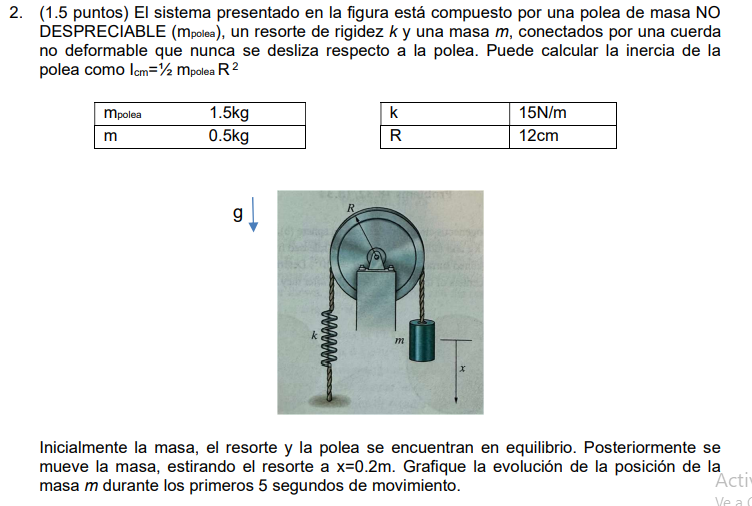

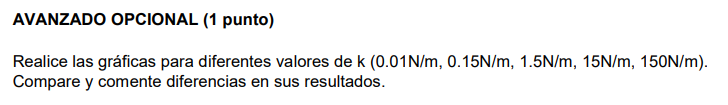

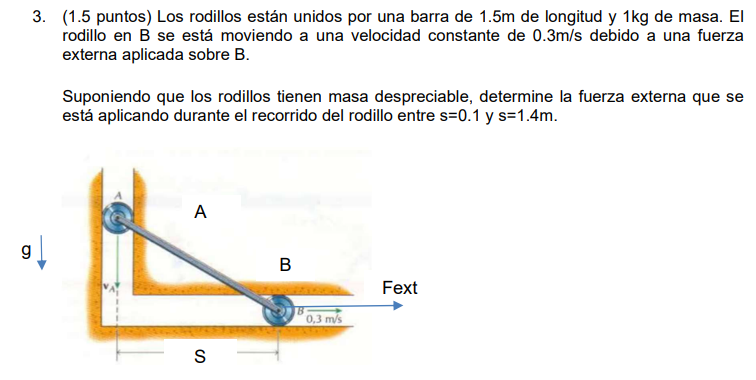

Fuerza externa simbólica F_ext(s):
   -g⋅m⋅s(t)     
─────────────────
     ____________
    ╱  2    2    
2⋅╲╱  L  - s (t) 


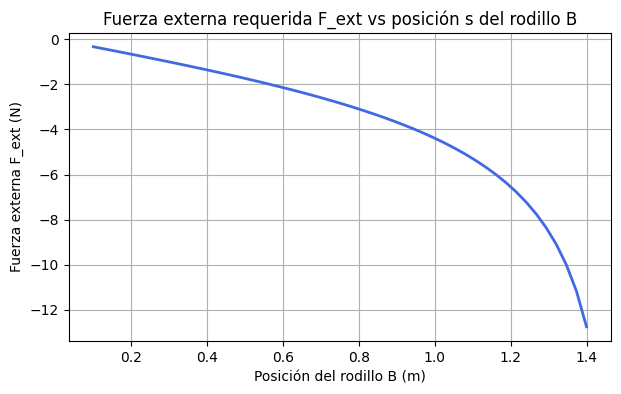

s = 0.10 m → F_ext = -0.328 N
s = 1.40 m → F_ext = -12.752 N


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols

# =======================
# 1. Definición de variables y marcos
# =======================
N = ReferenceFrame("N")
s = dynamicsymbols("s")        # desplazamiento horizontal del rodillo B
L, m, g = sp.symbols("L m g", positive=True, real=True)

# =======================
# 2. Cinemática geométrica
# =======================
# Relación geométrica: sin(theta) = s / L
theta = sp.asin(s / L)
A = N.orientnew("A", "Axis", (-sp.pi/2 + theta, N.z))  # marco del cuerpo (barra AB)

# Posición del centro de masa desde A (mitad de la barra)
r_G = (L/2) * A.x

# =======================
# 3. Fuerzas aplicadas
# =======================
# Fuerzas desconocidas y externas
N_A, N_B, F_ext = sp.symbols("N_A N_B F_ext")

# Suma de fuerzas (a_CM = 0, movimiento a velocidad constante)
sumF = N_A*N.x + N_B*N.y - m*g*N.y + F_ext*N.x

# =======================
# 4. Momentos respecto al centro de masa
# =======================
r_A = -r_G       # vector desde el CM hacia A
r_B = (L/2)*A.x  # vector desde el CM hacia B

# Momento total en el CM
sumM = r_A.cross(N_A*N.x) + r_B.cross(N_B*N.y) + r_B.cross(F_ext*N.x)

# =======================
# 5. Ecuaciones escalares (Newton-Euler)
# =======================
eqs = [
    sumF.dot(N.x),
    sumF.dot(N.y),
    sumM.dot(N.z)
]

# Resolver sistema simbólico
sol = sp.solve(eqs, [N_A, N_B, F_ext], dict=True)[0]

# Expresión simbólica de la fuerza externa
F_ext_expr = sp.simplify(sol[F_ext])
print("Fuerza externa simbólica F_ext(s):")
sp.pprint(F_ext_expr)

# =======================
# 6. Sustitución de valores numéricos
# =======================
params = {L: 1.5, m: 1, g: 9.81}
s_vals = np.linspace(0.1, 1.4, 50)
F_vals = [float(F_ext_expr.subs(params | {s: val})) for val in s_vals]

# =======================
# 7. Gráfica F_ext vs s
# =======================
plt.figure(figsize=(7,4))
plt.plot(s_vals, F_vals, color='royalblue', linewidth=2)
plt.title("Fuerza externa requerida F_ext vs posición s del rodillo B")
plt.xlabel("Posición del rodillo B (m)")
plt.ylabel("Fuerza externa F_ext (N)")
plt.grid(True)
plt.show()

# =======================
# 8. Valores específicos
# =======================
for val in [0.1, 1.4]:
    print(f"s = {val:.2f} m → F_ext = {float(F_ext_expr.subs(params | {s: val})):0.3f} N")


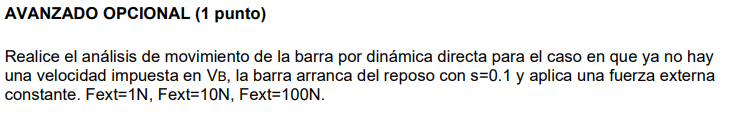

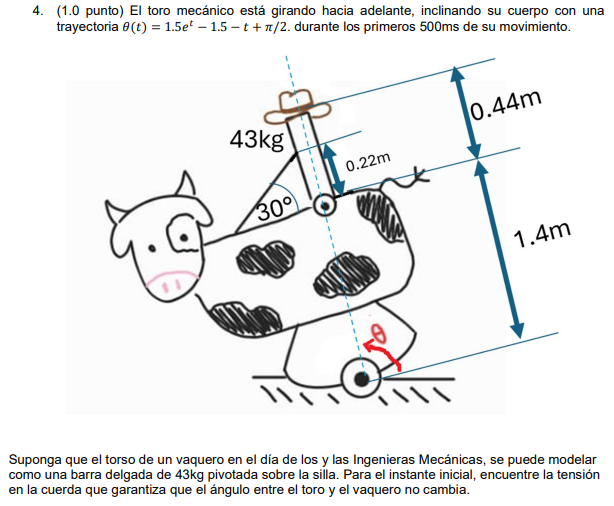

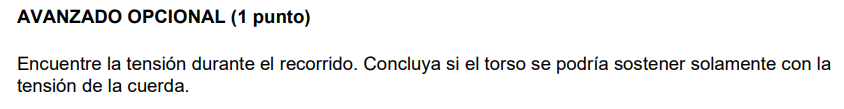